# **Space X  Falcon 9 First Stage Landing Prediction**


##  Machine Learning Prediction


## Objectives



*   create a column for the class
*   Standardize the data
*   Split into training data and test data
    \-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression
*   Find the method performs best using test data


***


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [38]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])

In [39]:
data = pd.read_csv('E:\\DATA\\SpaceX_dataset\\dataset_part_2.csv')

In [40]:
X = pd.read_csv('E:\\DATA/SpaceX_dataset\\dataset_part_3.csv')

In [41]:
Y = data['Class']
Y.value_counts(normalize=True)

1    0.666667
0    0.333333
Name: Class, dtype: float64

In [42]:
# Standardize the data
transform = StandardScaler()
X = transform.fit(X).transform(X)
X

array([[-1.71291154e+00, -1.94814463e-16, -6.53912840e-01, ...,
        -8.35531692e-01,  1.93309133e+00, -1.93309133e+00],
       [-1.67441914e+00, -1.19523159e+00, -6.53912840e-01, ...,
        -8.35531692e-01,  1.93309133e+00, -1.93309133e+00],
       [-1.63592675e+00, -1.16267307e+00, -6.53912840e-01, ...,
        -8.35531692e-01,  1.93309133e+00, -1.93309133e+00],
       ...,
       [ 1.63592675e+00,  1.99100483e+00,  3.49060516e+00, ...,
         1.19684269e+00, -5.17306132e-01,  5.17306132e-01],
       [ 1.67441914e+00,  1.99100483e+00,  1.00389436e+00, ...,
         1.19684269e+00, -5.17306132e-01,  5.17306132e-01],
       [ 1.71291154e+00, -5.19213966e-01, -6.53912840e-01, ...,
        -8.35531692e-01, -5.17306132e-01,  5.17306132e-01]])

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print ('Train set:', X_train.shape)
print ('Test set:', X_test.shape)

Train set: (72, 83)
Test set: (18, 83)


In [44]:
Y_test.shape

(18,)

Create a logistic regression object using then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [45]:
#cv = 10
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [46]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()
logreg_cv = GridSearchCV(lr, parameters, cv=10)
logreg_cv = logreg_cv.fit(X_train, Y_train)

In [47]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8464285714285713


In [48]:
logreg_cv = logreg_cv.best_estimator_

Calculate the accuracy on the test data :


In [49]:
logreg_S = logreg_cv.score(X_test, Y_test)
logreg_S

0.8333333333333334

### confusion matrix:


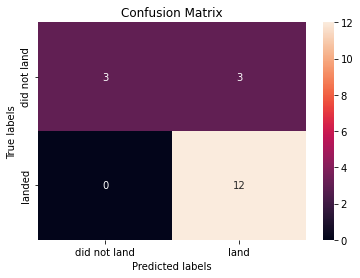

In [50]:
yhat_lr=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat_lr)

In [51]:
#cv = 10
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [52]:
svm_cv = GridSearchCV(svm, parameters, cv=10)
svm_cv = svm_cv.fit(X_train, Y_train)

In [53]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8482142857142856


Calculate the accuracy on the test data :


In [54]:
svm_S = svm_cv.score(X_test, Y_test)
svm_S

0.8333333333333334

### confusion matrix


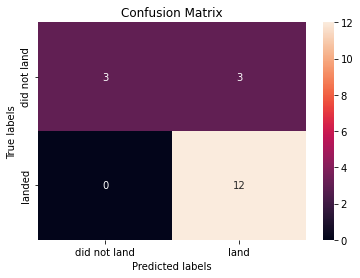

In [55]:
yhat_sv = svm_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat_sv)

In [56]:
#cv = 10
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [57]:
tree_cv = GridSearchCV(tree, parameters, cv=10)
tree_cv = tree_cv.fit(X_train, Y_train)

In [58]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 14, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'best'}
accuracy : 0.875


Calculate the accuracy of tree_cv on the test data :


In [59]:
tree_S = tree_cv.score(X_test, Y_test)
tree_S

0.8333333333333334

### confusion matrix

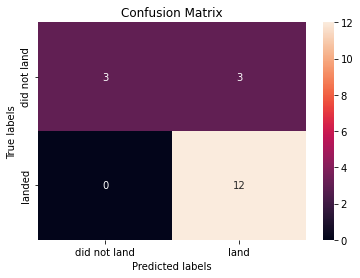

In [60]:
yhat_tr = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat_tr)

In [61]:
#cv = 10
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [62]:
knn_cv = GridSearchCV(KNN, parameters, cv=10)
knn_cv = knn_cv.fit(X_train, Y_train)

In [63]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.8482142857142858


Calculate the accuracy of tree_cv on the test data :


In [64]:
knn_S = knn_cv.score(X_test, Y_test)
knn_S

0.8333333333333334

### confusion matrix


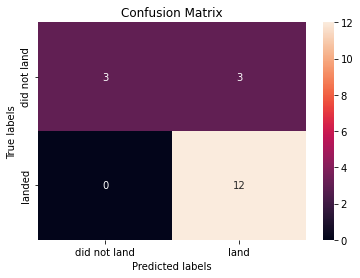

In [65]:
yhat_k = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat_k)

### Gradient Boosting Classifier

In [66]:
#cv = 10
param_grid = {
     'n_estimators': [50, 80, 100, 120, 150],
     'learning_rate': [0.1, 0.01, 0.001, 0.0001],
     'subsample' : [1.0, 0.5],
     'max_features': list(range(2,5)),
}

GBC = GradientBoostingClassifier(random_state=1234)

In [67]:
GBC_grid_cv = GridSearchCV(GBC, 
                      param_grid = param_grid, 
                      scoring='accuracy',
                      n_jobs=-1 )

In [68]:
GBC_grid_cv.fit(X_train, Y_train)

GridSearchCV(estimator=GradientBoostingClassifier(random_state=1234), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.001, 0.0001],
                         'max_features': [2, 3, 4],
                         'n_estimators': [50, 80, 100, 120, 150],
                         'subsample': [1.0, 0.5]},
             scoring='accuracy')

In [69]:
GBC_grid_cv.best_params_

{'learning_rate': 0.01,
 'max_features': 4,
 'n_estimators': 150,
 'subsample': 1.0}

In [70]:
GBC_grid_cv.best_estimator_

GradientBoostingClassifier(learning_rate=0.01, max_features=4, n_estimators=150,
                           random_state=1234)

In [71]:
y_hat_GBC = GBC_grid_cv.predict(X_test)

In [76]:
GB_S = GBC_grid_cv.score(X_test, Y_test)

In [73]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_hat_GBC))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.80      1.00      0.89        12

    accuracy                           0.83        18
   macro avg       0.90      0.75      0.78        18
weighted avg       0.87      0.83      0.81        18



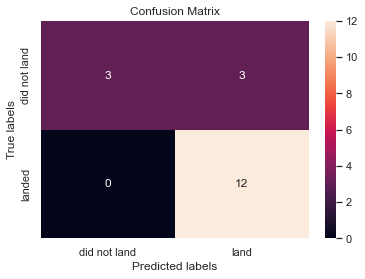

In [115]:
plot_confusion_matrix(Y_test, y_hat_GBC)

### Random Forest Classifier with class weighting

In [86]:
param_grid = {'n_estimators' : [20, 50 ,80, 100, 150],
             'min_samples_split' : [4, 5, 6, 8, 10],
             'bootstrap' : [True, False],
             'max_depth' : [5, 8, 10]
}
RF = RandomForestClassifier(random_state=123)       
RF_GCV = GridSearchCV(estimator=RF,
                      param_grid=param_grid,
                      scoring='f1',
                      n_jobs=-1
)
RF_GCV.fit(X_train, Y_train)
RF_GCV.best_estimator_

RandomForestClassifier(max_depth=5, min_samples_split=5, n_estimators=50,
                       random_state=123)

In [87]:
RF_y_pred = RF_GCV.predict(X_test)
RF_S = RF_GCV.score(X_test, Y_test)
print(f'Random Forest Score : {RF_S}')
print(classification_report(Y_test, RF_y_pred))

Random Forest Score : 0.888888888888889
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.80      1.00      0.89        12

    accuracy                           0.83        18
   macro avg       0.90      0.75      0.78        18
weighted avg       0.87      0.83      0.81        18



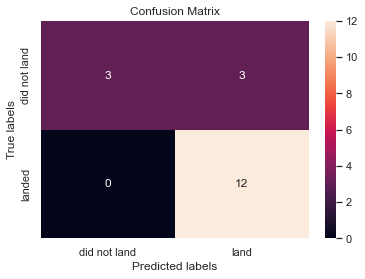

In [89]:
plot_confusion_matrix(Y_test, RF_y_pred)

## Weighting for imbalance classes

In [90]:
RF = RandomForestClassifier(random_state=123,
                            class_weight= {0 : 0.7, 1 : 0.3},
                            n_estimators=50,
                            min_samples_split=5,
                            max_depth=5
)
RF.fit(X_train, Y_train)

RandomForestClassifier(class_weight={0: 0.7, 1: 0.3}, max_depth=5,
                       min_samples_split=5, n_estimators=50, random_state=123)

In [91]:
RF_y_pred = RF.predict(X_test)
RF_S = RF.score(X_test, Y_test)
print(f'Random Forest Score : {RF_S}')
print(classification_report(Y_test, RF_y_pred))

Random Forest Score : 0.9444444444444444
              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.92      1.00      0.96        12

    accuracy                           0.94        18
   macro avg       0.96      0.92      0.93        18
weighted avg       0.95      0.94      0.94        18



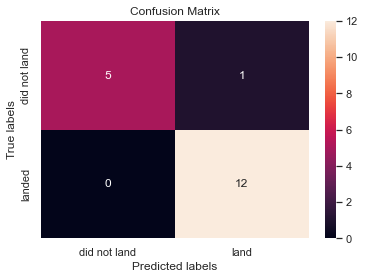

In [92]:
plot_confusion_matrix(Y_test, RF_y_pred)

Find the method performs best:


### calculate the weighted F1 scores for each Classifiers :

In [93]:
from sklearn.metrics import f1_score
print('f1_score for LR :', f1_score(Y_test, yhat_lr, average='weighted'))
print('f1_score for SVM :', f1_score(Y_test, yhat_sv, average='weighted'))
print('f1_score for DTree :',f1_score(Y_test, yhat_tr, average='weighted'))
print('f1_score for KNN :', f1_score(Y_test, yhat_k, average='weighted'))
print('f1_score for Gradient Boosting :', f1_score(Y_test, y_hat_GBC, average='weighted'))
print('f1_score for Random Forest :', f1_score(Y_test, RF_y_pred, average='weighted'))

f1_score for LR : 0.8148148148148149
f1_score for SVM : 0.8148148148148149
f1_score for DTree : 0.8148148148148149
f1_score for KNN : 0.8148148148148149
f1_score for Gradient Boosting : 0.8148148148148149
f1_score for Random Forest : 0.9430303030303031


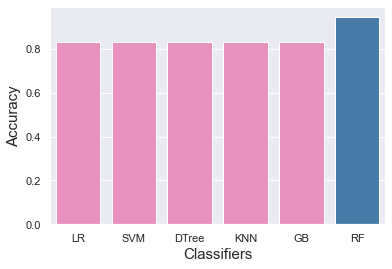

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")

x = ['LR', 'SVM', 'DTree', 'KNN', 'GB', 'RF']
y = [logreg_S, svm_S, tree_S, knn_S, GB_S, RF_S]


def colors_from_values(values, palette_name):
    
    normalized = (values - min(values)) / (max(values) - min(values))
    # convert to indices
    indices = np.round(normalized * (len(values) - 1)).astype(np.int32)
    # use the indices to get the colors
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)

ax= sns.barplot(x=x, y=y, palette=colors_from_values(y,"Set1_r"))
plt.xlabel('Classifiers', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.show()

#### Select __Random Forest__ for the final model, because false positives in the confusion matrix for this model is less than other models and F1 scores is greater than others.

| Algorithm          |  F1-score |
|--------------------|-----------|
|LogisticRegression  | 0.814     |
|SVM                 |  0.814    |
|Decision Tree       | 0.814     |
| KNN                | 0.814     |
| Gradient Boosting  | 0.814     |
|__Random Forest__   | __0.943__  |

__Version author : Sina Baghdadi__

